In [90]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [91]:
df=pd.read_csv('Mushroom.csv')
df

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [92]:
df=pd.DataFrame(data=df)

In [93]:
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=['classes','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [94]:
data=df.drop('classes',axis=1)

In [95]:
target=df['classes']
target

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: classes, Length: 8124, dtype: int32

In [96]:
pca=PCA(n_components=10)
data=pca.fit_transform(data)
data

array([[ 0.22820662, -0.34547209, -1.42442514, ...,  3.64358855,
        -0.92581182,  0.36680766],
       [-1.93656097,  4.79691211, -3.51166784, ..., -0.61776406,
         0.23213088,  0.07507515],
       [-1.65417317,  2.46436226, -3.88082715, ...,  0.66746969,
        -0.18841658,  0.33120588],
       ...,
       [-1.86050705,  0.47024368,  1.19021189, ...,  1.09550111,
        -0.23495457, -0.25898422],
       [ 7.29306843, -1.25169255, -1.24197629, ...,  1.25810698,
        -0.31653774, -0.58907278],
       [-4.83553281, -3.58375805, -0.11250607, ..., -0.42149836,
         0.42627554, -0.06795613]])

In [97]:
data=pd.DataFrame(data=data)
data[10]=target

In [98]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.228207,-0.345472,-1.424425,-1.246722,2.088737,2.645915,-1.032036,3.643589,-0.925812,0.366808,1
1,-1.936561,4.796912,-3.511668,-1.245720,0.551144,-0.283909,2.550317,-0.617764,0.232131,0.075075,0
2,-1.654173,2.464362,-3.880827,1.222505,1.043965,-2.052608,-2.190863,0.667470,-0.188417,0.331206,0
3,-1.252026,1.679664,-3.565488,0.586997,0.679516,2.792790,-0.396476,4.161473,-1.013877,-0.498926,1
4,1.581220,-1.002043,-1.255760,-1.970625,0.070293,3.301132,-1.258234,-2.004355,0.602214,-1.342796,0
...,...,...,...,...,...,...,...,...,...,...,...
8119,-6.469823,-2.308511,0.588111,1.118114,0.617045,1.426498,-1.800509,0.158004,0.106866,-0.649487,0
8120,-6.525909,-2.280695,1.431399,0.329901,0.274762,1.946724,0.208437,1.467637,-0.291823,-0.433137,0
8121,-1.860507,0.470244,1.190212,-0.306579,0.364383,0.053368,-2.843708,1.095501,-0.234955,-0.258984,0
8122,7.293068,-1.251693,-1.241976,0.781739,-1.592310,0.043870,-0.311706,1.258107,-0.316538,-0.589073,1


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 11 columns):
0     8124 non-null float64
1     8124 non-null float64
2     8124 non-null float64
3     8124 non-null float64
4     8124 non-null float64
5     8124 non-null float64
6     8124 non-null float64
7     8124 non-null float64
8     8124 non-null float64
9     8124 non-null float64
10    8124 non-null int32
dtypes: float64(10), int32(1)
memory usage: 666.5 KB


In [100]:
data.shape

(8124, 11)

In [101]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [102]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8124.000000
mean,2.636985e-15,-8.381063e-16,1.532372e-15,1.756186e-15,-7.857930e-18,5.990066e-16,1.653582e-17,4.861257e-16,3.582806e-16,-4.393779e-17,0.482029
std,4.157262e+00,2.913540e+00,2.507936e+00,1.865351e+00,1.727795e+00,1.614662e+00,1.546364e+00,1.414538e+00,1.353403e+00,1.151859e+00,0.499708
min,-7.186581e+00,-6.733563e+00,-7.322374e+00,-5.549168e+00,-3.563351e+00,-4.305893e+00,-4.433678e+00,-4.034428e+00,-4.612439e+00,-2.134282e+00,0.000000
25%,-3.121464e+00,-2.126469e+00,-1.442189e+00,-1.221971e+00,-1.163555e+00,-1.216192e+00,-1.088275e+00,-9.826112e-01,-4.239836e-01,-1.038800e+00,0.000000
50%,-9.707330e-01,-6.256058e-01,-1.299987e-01,-1.626013e-01,-2.876669e-01,4.453744e-02,-1.220978e-01,1.293425e-01,1.191560e-02,-6.774831e-02,0.000000
75%,1.889445e+00,1.808065e+00,1.384977e+00,9.546671e-01,8.490598e-01,9.992095e-01,1.162319e+00,9.841373e-01,4.748488e-01,8.647300e-01,1.000000
max,7.917838e+00,8.152221e+00,8.837761e+00,9.092527e+00,6.138878e+00,4.724657e+00,5.128358e+00,4.693669e+00,4.656484e+00,3.037611e+00,1.000000


In [103]:
for col in data.columns.values:
    print("Number of unique values of{} :{} ".format(col,data[col].nunique()))

Number of unique values of0 :8124 
Number of unique values of1 :8124 
Number of unique values of2 :8124 
Number of unique values of3 :8124 
Number of unique values of4 :8124 
Number of unique values of5 :8124 
Number of unique values of6 :8124 
Number of unique values of7 :8124 
Number of unique values of8 :8124 
Number of unique values of9 :8124 
Number of unique values of10 :2 


In [104]:
data.skew()

0     0.635138
1     0.574512
2     0.444208
3     0.793095
4     0.741290
5     0.189428
6    -0.053544
7    -0.097630
8     0.022523
9     0.311111
10    0.071946
dtype: float64

In [105]:
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [106]:
data.skew()

0    -1.093706
1    -1.394667
2     0.444208
3    -1.323269
4    -1.457443
5     0.189428
6    -0.053544
7    -0.097630
8     0.022523
9     0.311111
10    0.071946
dtype: float64

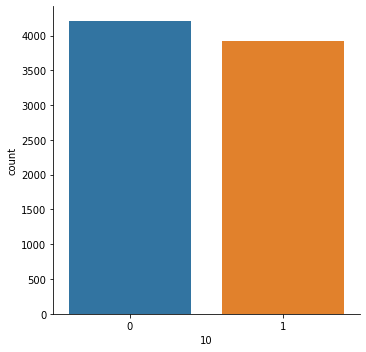

In [107]:
sns.catplot(x=10,data=data,kind='count')

In [108]:
data.isnull().sum()

0     4025
1     3438
2        0
3     2428
4     2350
5        0
6        0
7        0
8        0
9        0
10       0
dtype: int64

In [109]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imp=imputer.fit(data)
df_titanic=imp.fit_transform(data.values)
print(df_titanic)
df_new=pd.DataFrame(data=df_titanic)
df_new

[[ 0.20555508 -0.42384105 -1.42442514 ... -0.92581182  0.36680766
   1.        ]
 [ 0.80518601  1.75732538 -3.51166784 ...  0.23213088  0.07507515
   0.        ]
 [ 0.80518601  1.24252856 -3.88082715 ... -0.18841658  0.33120588
   0.        ]
 ...
 [ 0.80518601  0.38542815  1.19021189 ... -0.23495457 -0.25898422
   0.        ]
 [ 2.11542004  0.54171536 -1.24197629 ... -0.31653774 -0.58907278
   1.        ]
 [ 0.80518601  0.54171536 -0.11250607 ...  0.42627554 -0.06795613
   0.        ]]


,0,1,2,3,4,5,6,7,8,9,10
0,0.205555,-0.423841,-1.424425,0.189033,1.127762,2.645915,-1.032036,3.643589,-0.925812,0.366808,1.0
1,0.805186,1.757325,-3.511668,0.189033,0.438993,-0.283909,2.550317,-0.617764,0.232131,0.075075,0.0
2,0.805186,1.242529,-3.880827,0.798635,0.714892,-2.052608,-2.190863,0.667470,-0.188417,0.331206,0.0
3,0.805186,0.985691,-3.565488,0.461844,0.518506,2.792790,-0.396476,4.161473,-1.013877,-0.498926,1.0
4,0.948262,0.541715,-1.255760,0.189033,0.067932,3.301132,-1.258234,-2.004355,0.602214,-1.342796,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8119,0.805186,0.541715,0.588111,0.750526,0.480600,1.426498,-1.800509,0.158004,0.106866,-0.649487,0.0
8120,0.805186,0.541715,1.431399,0.285104,0.242760,1.946724,0.208437,1.467637,-0.291823,-0.433137,0.0
8121,0.805186,0.385428,1.190212,-0.366118,0.310703,0.053368,-2.843708,1.095501,-0.234955,-0.258984,0.0
8122,2.115420,0.541715,-1.241976,0.577590,0.095623,0.043870,-0.311706,1.258107,-0.316538,-0.589073,1.0


In [110]:
df_new.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

(11.0, 0.0)

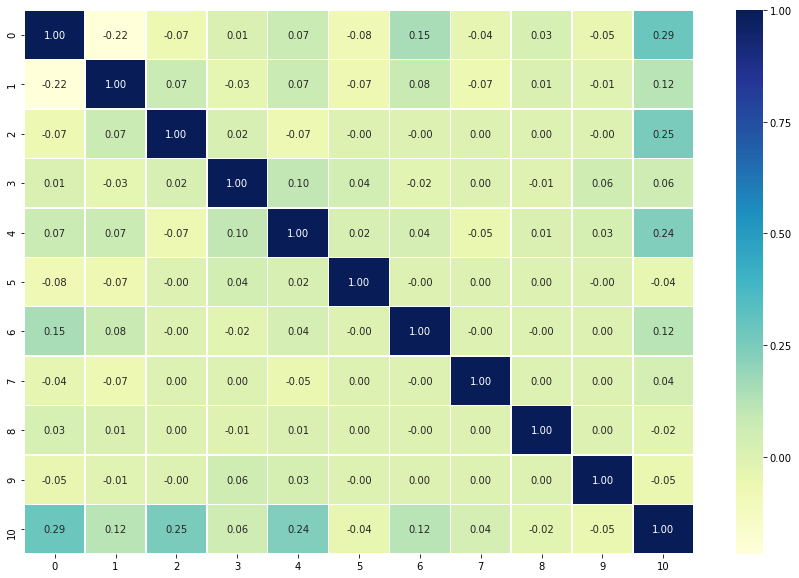

In [111]:
corr_matrix = df_new.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [112]:
df_new.shape

(8124, 11)

In [113]:
df_new.skew()

0    -1.539458
1    -1.836097
2     0.444208
3    -1.580207
4    -1.728643
5     0.189428
6    -0.053544
7    -0.097630
8     0.022523
9     0.311111
10    0.071946
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016262225C88>,
      dtype=object)

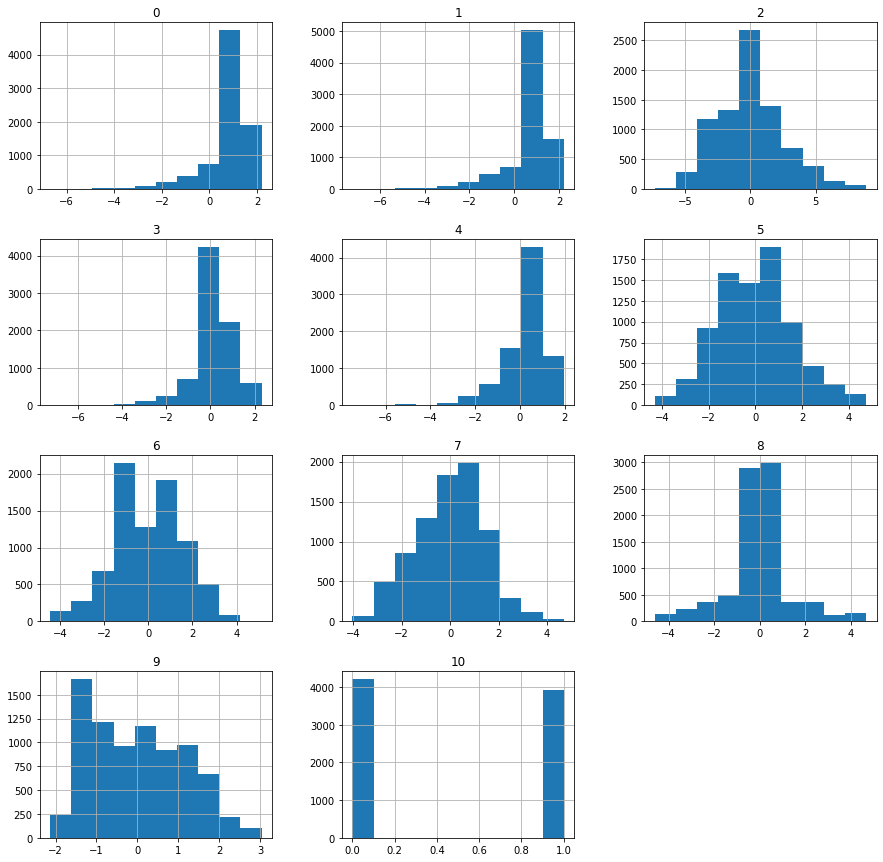

In [114]:
df_new.hist(figsize=(15,15))

In [115]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
print(df_new.shape)
df_mushroom=df_new.loc[(z<3).all(axis=1)]
print(df_mushroom.shape)

(8124, 11)
(7311, 11)


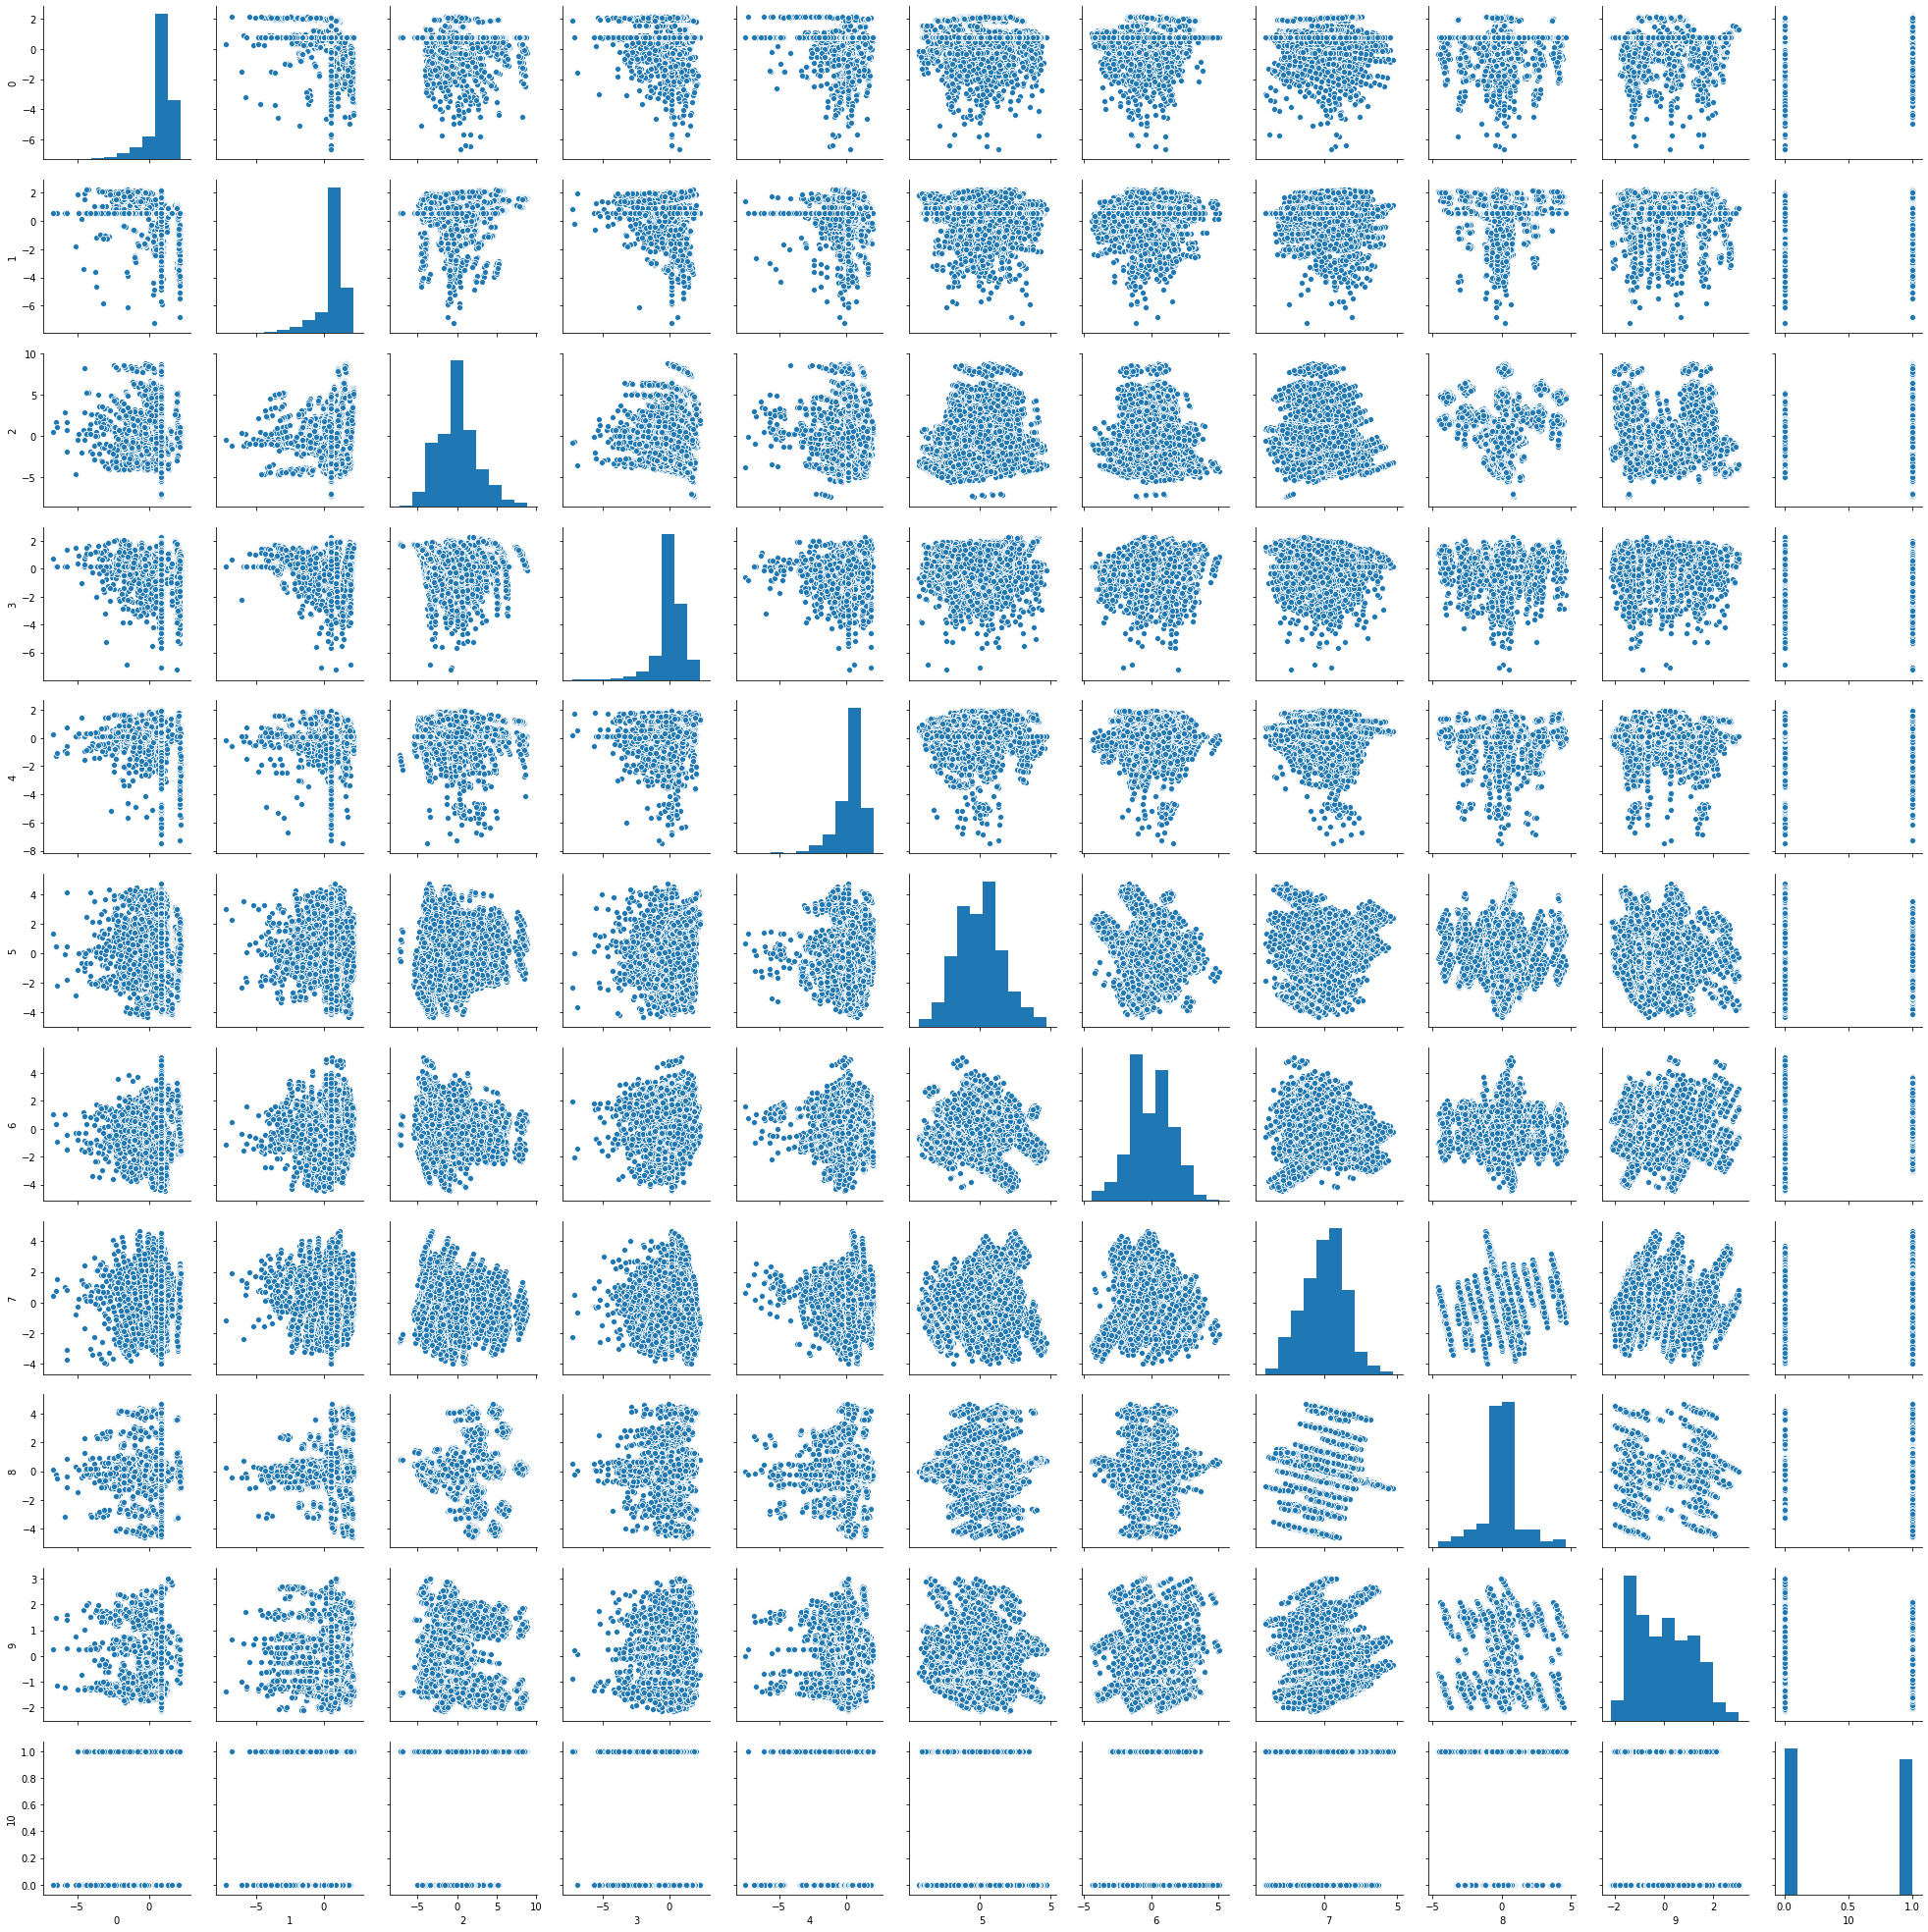

In [116]:
sns.pairplot(df_new)

In [117]:
x=df_mushroom.iloc[:,0:-1]
x

,0,1,2,3,4,5,6,7,8,9
0,0.205555,-0.423841,-1.424425,0.189033,1.127762,2.645915,-1.032036,3.643589,-0.925812,0.366808
1,0.805186,1.757325,-3.511668,0.189033,0.438993,-0.283909,2.550317,-0.617764,0.232131,0.075075
2,0.805186,1.242529,-3.880827,0.798635,0.714892,-2.052608,-2.190863,0.667470,-0.188417,0.331206
3,0.805186,0.985691,-3.565488,0.461844,0.518506,2.792790,-0.396476,4.161473,-1.013877,-0.498926
4,0.948262,0.541715,-1.255760,0.189033,0.067932,3.301132,-1.258234,-2.004355,0.602214,-1.342796
...,...,...,...,...,...,...,...,...,...,...
8119,0.805186,0.541715,0.588111,0.750526,0.480600,1.426498,-1.800509,0.158004,0.106866,-0.649487
8120,0.805186,0.541715,1.431399,0.285104,0.242760,1.946724,0.208437,1.467637,-0.291823,-0.433137
8121,0.805186,0.385428,1.190212,-0.366118,0.310703,0.053368,-2.843708,1.095501,-0.234955,-0.258984
8122,2.115420,0.541715,-1.241976,0.577590,0.095623,0.043870,-0.311706,1.258107,-0.316538,-0.589073


In [118]:
y=df_mushroom.iloc[:,-1]
y

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
8119    0.0
8120    0.0
8121    0.0
8122    1.0
8123    0.0
Name: 10, Length: 7311, dtype: float64

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.3,stratify=y)

In [120]:
from sklearn.naive_bayes import GaussianNB

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
         }

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(58)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [121]:

model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores


{'Logistic Regression': 0.7424794895168642,
 'KNN': 0.9854147675478578,
 'Random Forest': 0.99179580674567,
 'GaussianNB': 0.7885141294439381,
 'SVC': 0.9913400182315406,
 'DecisionTreeClassifier': 0.9799453053783045}

In [122]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
models = {"Random Forest": RandomForestClassifier(n_estimators=100),
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier()
         # "MultinomialNB":MultinomialNB()
         }
# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_acc_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(x_train,y_train)
        pre=model.predict(x_test)
        model_acc_scores[name]=accuracy_score(y_test,pre)
    return model_acc_scores

In [123]:
model_acc_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test,
                             )

model_acc_scores

{'Random Forest': 0.9981768459434822,
 'Logistic Regression': 0.7424794895168642,
 'KNN': 0.9854147675478578,
 'GaussianNB': 0.7885141294439381,
 'SVC': 0.9913400182315406,
 'DecisionTreeClassifier': 0.9799453053783045,
 'GradientBoostingClassifier': 0.9567000911577028}

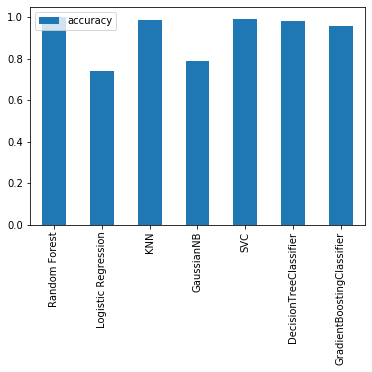

In [124]:
model_compare = pd.DataFrame(model_acc_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [125]:
def maxaccscore(model,x,y):
    max_acc_score=0
    for acc_state in range(42,100): 
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        accuracy_score1=accuracy_score(y_test,y_pred)
        if accuracy_score1 > max_acc_score:
            max_acc_score=accuracy_score1
            final_acc_state=acc_state
    print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)
    return final_acc_state

In [126]:
rm=RandomForestClassifier(n_estimators=100)
acc_score=maxaccscore(rm,x,y)

max acc score corresponding to 42 is: 0.9981768459434822


In [127]:
svc=SVC()
acc_score=maxaccscore(svc,x,y)

max acc score corresponding to 42 is: 0.9913400182315406


In [128]:
dtc=DecisionTreeClassifier()
acc_score=maxaccscore(dtc,x,y)

max acc score corresponding to 42 is: 0.9799453053783045


In [129]:
svc=KNeighborsClassifier()
acc_score=maxaccscore(dtc,x,y)

max acc score corresponding to 42 is: 0.9794895168641751


******************** SVC *********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Accuracy Score= 0.9913400182315406


Cross_val_score= 0.9361187342614441


roc_auc_score =  0.9912207079386648


Classification report
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1146
         1.0       0.99      0.99      0.99      1048

    accuracy                           0.99      2194
   macro avg       0.99      0.99      0.99      2194
weighted avg       0.99      0.99      0.99      2194



[[1139    7]
 [  12 1036]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



******************** Random Forest *********************


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth

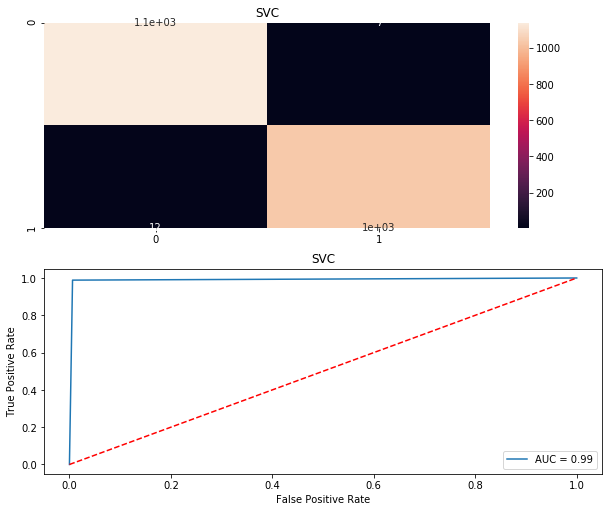

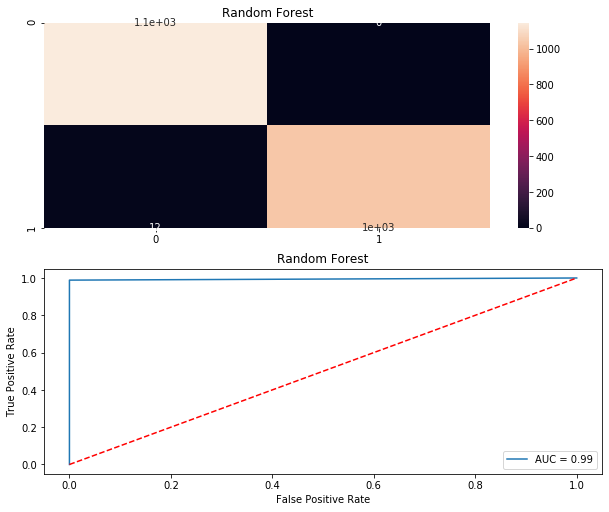

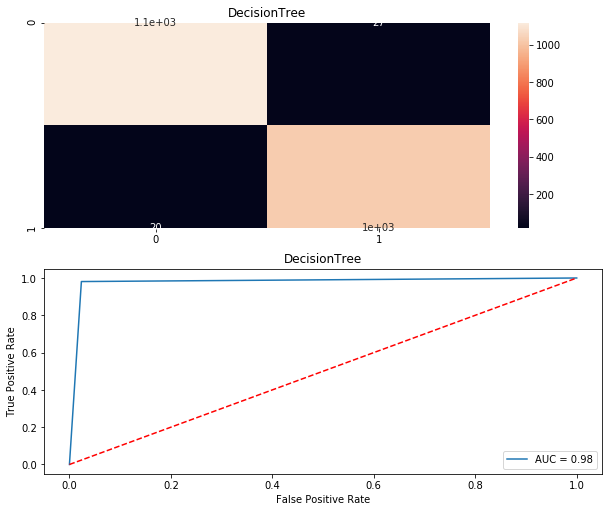

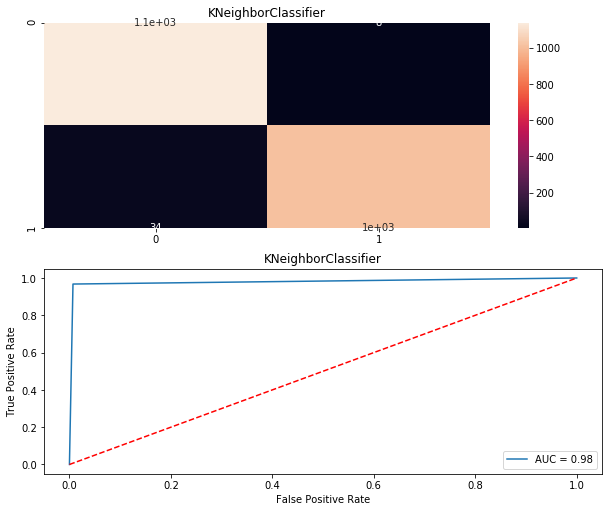

In [130]:
models =[]
models.append(("SVC",SVC()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("KNeighborClassifier",KNeighborsClassifier(n_neighbors=6)))    

Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("********************",name,"*********************")
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label= 'AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n\n")



In [131]:
result=pd.DataFrame({'Model':Model,'accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,accuracy_score,Cross_val_score,Roc_auc_curve
0,SVC,99.134002,93.611873,99.122071
1,Random Forest,99.453054,94.022795,99.427481
2,DecisionTree,97.857794,93.941258,97.867791
3,KNeighborClassifier,98.085688,92.380214,98.028822


In [132]:
from sklearn.model_selection import GridSearchCV
grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
# Split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=.20)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   8.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   9.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   9.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   8.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   8.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500, total=  11.5s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=  12.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=  12.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=  12.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=  12.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=  12.0s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   7.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   8.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   9.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   8.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   9.0s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=  12.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=  11.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   4.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   4.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   4.8s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   5.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   5.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   7.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   7.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   7.8s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   5.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   5.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   7.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   6.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   6.9s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   8.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   8.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   7.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   7.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   7.3s
[CV] max_depth=10, max_features=auto, min_samp

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   8.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   8.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   8.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=  11.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=  11.1s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   6.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   6.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   6.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   6.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   8.4s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=  14.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=  13.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=  14.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=  13.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=  14.0s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 50.7min finished


In [133]:
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_test labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(x_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 99.93%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


In [134]:
gs_clf.best_params_


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1200}

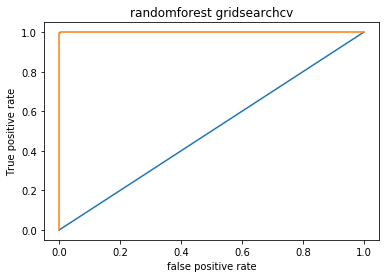

roc_auc_score =  0.9999962422261053


In [135]:
# Make predictions with probabilities
y_probs = gs_clf.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='adabooster')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('randomforest gridsearchcv')
plt.show()
roc_auc=auc(fpr,tpr)
print('roc_auc_score = ',roc_auc)

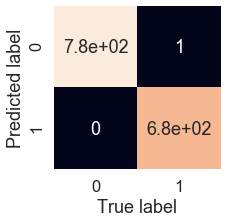

In [136]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, gs_y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, gs_y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, gs_y_preds)

In [137]:
a=pd.DataFrame(data=y_test)
a['ypred']=gs_y_preds
a

,10,ypred
8051,0.0,0.0
2966,0.0,0.0
6146,1.0,1.0
7056,1.0,1.0
6291,1.0,1.0
...,...,...
6890,1.0,1.0
6573,1.0,1.0
5353,1.0,1.0
5209,1.0,1.0


In [138]:
from sklearn.externals import joblib
joblib.dump(gs_clf,'mushroom_predict.pkl')

['mushroom_predict.pkl']

In [139]:
rf_from_joblib=joblib.load('mushroom_predict.pkl')
joblib_y_preds = rf_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 99.93%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}